# TTDS: Machine Learning project 

# Accuracy Improved Random Forest Algorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("D:/DataSets/diabetes.csv")

In [3]:
data

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Dataset Extension

In [4]:
# Generate synthetic data by doubling the 'label' values
data_synthetic = data.copy()

# Concatenate the original and synthetic DataFrames
df = pd.concat([data, data_synthetic], ignore_index=True)

# Display the extended DataFrame
df

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
1531,10,101,76,48,180,32.9,0.171,63,0
1532,2,122,70,27,0,36.8,0.340,27,0
1533,5,121,72,23,112,26.2,0.245,30,0
1534,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.head(10)

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
df.tail()

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
1531,10,101,76,48,180,32.9,0.171,63,0
1532,2,122,70,27,0,36.8,0.340,27,0
1533,5,121,72,23,112,26.2,0.245,30,0
1534,1,126,60,0,0,30.1,0.349,47,1
1535,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.columns

Index(['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi',
       'pedigree', 'age', 'label'],
      dtype='object')

In [8]:
print("Number of Row in the Dataset:", df.shape[0])
print("Number of Columns in the Dataset:", df.shape[1])

Number of Row in the Dataset: 1536
Number of Columns in the Dataset: 9


# Missing Values:

In [9]:
df.isnull().sum()

preg            0
glucose         0
bp_diastolic    0
skin_triceps    0
insulin         0
bmi             0
pedigree        0
age             0
label           0
dtype: int64

In [10]:
#check missing Values in the Dataset
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

preg
False    1536
Name: preg, dtype: int64

glucose
False    1536
Name: glucose, dtype: int64

bp_diastolic
False    1536
Name: bp_diastolic, dtype: int64

skin_triceps
False    1536
Name: skin_triceps, dtype: int64

insulin
False    1536
Name: insulin, dtype: int64

bmi
False    1536
Name: bmi, dtype: int64

pedigree
False    1536
Name: pedigree, dtype: int64

age
False    1536
Name: age, dtype: int64

label
False    1536
Name: label, dtype: int64



No missing values found in the dataset, therefore data doesn't need to be drop or replace. 

# Outliers Analysis

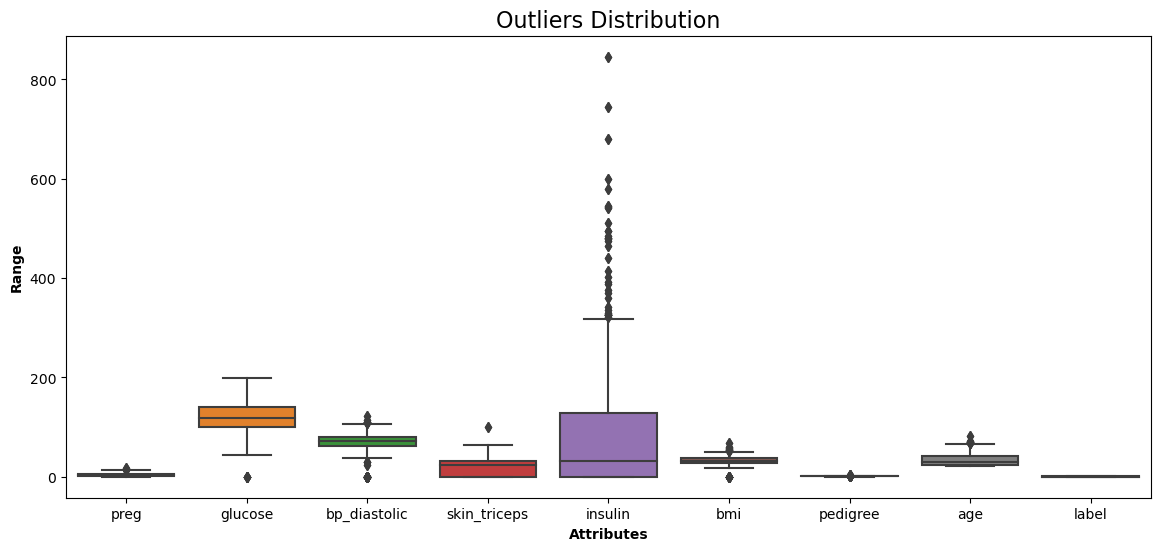

In [11]:
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
show_boxplot(df)

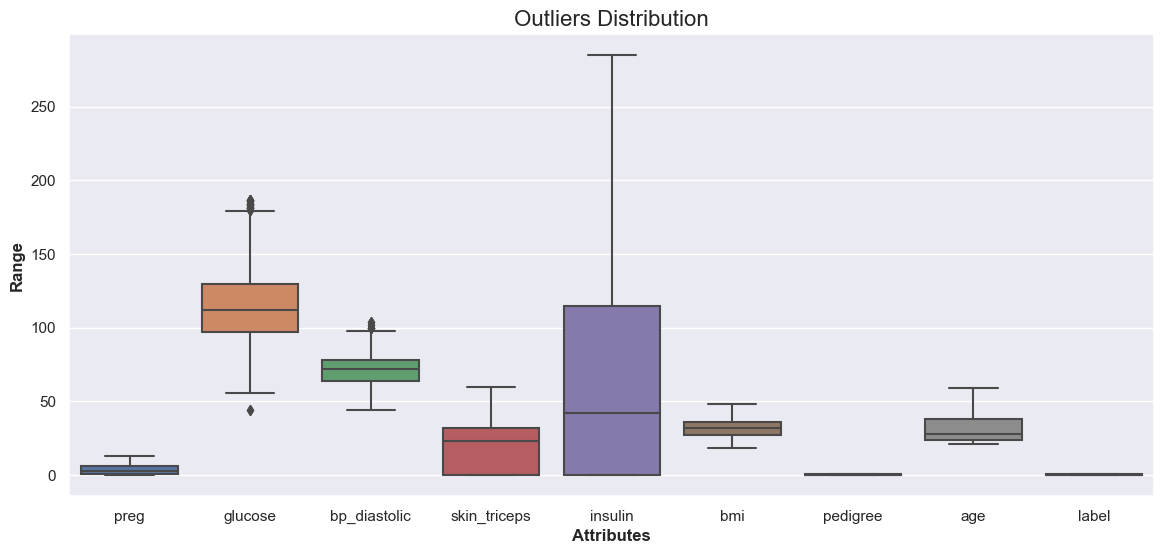

In [70]:
#Function 1st time
def remove_outliers(data):
   
    df = data.copy()

    for col in list(df.columns):
        Q1 = df[str(col)].quantile(0.25)
        Q3 = df[str(col)].quantile(0.75)
        IQR = Q3 - Q1
        # Define the lower and upper bounds to filter outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]

    return df
without_outliers = remove_outliers(df)
show_boxplot(without_outliers)

NOTE: Outliers completely removed, after function has been run two to three times. 

In [71]:
df=without_outliers

# Data Formating

In [72]:
df.dtypes

preg              int64
glucose           int64
bp_diastolic      int64
skin_triceps      int64
insulin           int64
bmi             float64
pedigree        float64
age               int64
label             int64
dtype: object

# Exploratory Data Analysis (EDA)

# Descriptive Satistics:

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,1154.0,3.714038,3.220655,0.000,1.000,3.000,6.00,13.000
glucose,1154.0,115.873484,26.601090,44.000,97.000,112.000,130.00,187.000
bp_diastolic,1154.0,71.512998,10.927511,44.000,64.000,72.000,78.00,104.000
skin_triceps,1154.0,20.554593,15.202166,0.000,0.000,23.000,32.00,60.000
insulin,1154.0,63.875217,74.846904,0.000,0.000,42.000,115.00,285.000
bmi,1154.0,31.771577,6.290296,18.200,27.200,31.900,35.80,48.300
pedigree,1154.0,0.412315,0.226911,0.078,0.238,0.349,0.56,1.034
age,1154.0,31.386482,9.661649,21.000,24.000,28.000,38.00,59.000
label,1154.0,0.287695,0.452884,0.000,0.000,0.000,1.00,1.000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1535
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   preg          1154 non-null   int64  
 1   glucose       1154 non-null   int64  
 2   bp_diastolic  1154 non-null   int64  
 3   skin_triceps  1154 non-null   int64  
 4   insulin       1154 non-null   int64  
 5   bmi           1154 non-null   float64
 6   pedigree      1154 non-null   float64
 7   age           1154 non-null   int64  
 8   label         1154 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 90.2 KB


In [75]:
df.corr()

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
preg,1.000000,0.138795,0.189098,-0.100705,-0.122938,0.032606,0.020097,0.631633,0.243163
glucose,0.138795,1.000000,0.226439,0.006170,0.245943,0.182561,0.053757,0.228683,0.471691
bp_diastolic,0.189098,0.226439,1.000000,0.021498,-0.047203,0.273685,0.008331,0.347694,0.155218
skin_triceps,-0.100705,0.006170,0.021498,1.000000,0.490409,0.370966,0.153382,-0.120126,0.028706
insulin,-0.122938,0.245943,-0.047203,0.490409,1.000000,0.184621,0.240362,-0.089042,0.093990
bmi,0.032606,0.182561,0.273685,0.370966,0.184621,1.000000,0.127087,0.100759,0.260131
pedigree,0.020097,0.053757,0.008331,0.153382,0.240362,0.127087,1.000000,0.025637,0.169632
age,0.631633,0.228683,0.347694,-0.120126,-0.089042,0.100759,0.025637,1.000000,0.304393
label,0.243163,0.471691,0.155218,0.028706,0.093990,0.260131,0.169632,0.304393,1.000000


In [76]:
#Total size of the Rows of dataset:
print("Total Rows of the dataset:", df.shape[0])

#Total size of the Columns of dataset:
print("Total Columns of the dataset:", df.shape[1])

Total Rows of the dataset: 1154
Total Columns of the dataset: 9


In [77]:
#check label value count 
df.label.value_counts()

0    822
1    332
Name: label, dtype: int64

# Graphical Analysis

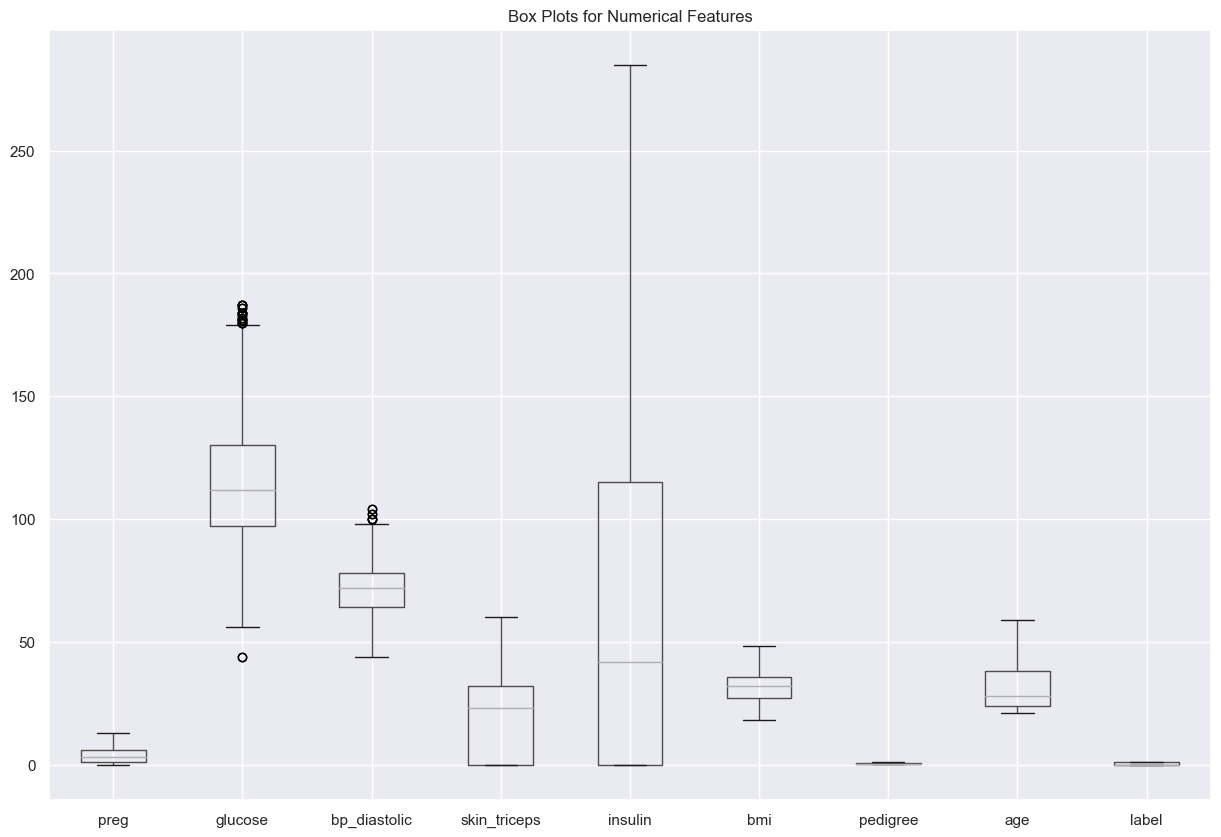

In [78]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title('Box Plots for Numerical Features')
plt.show()

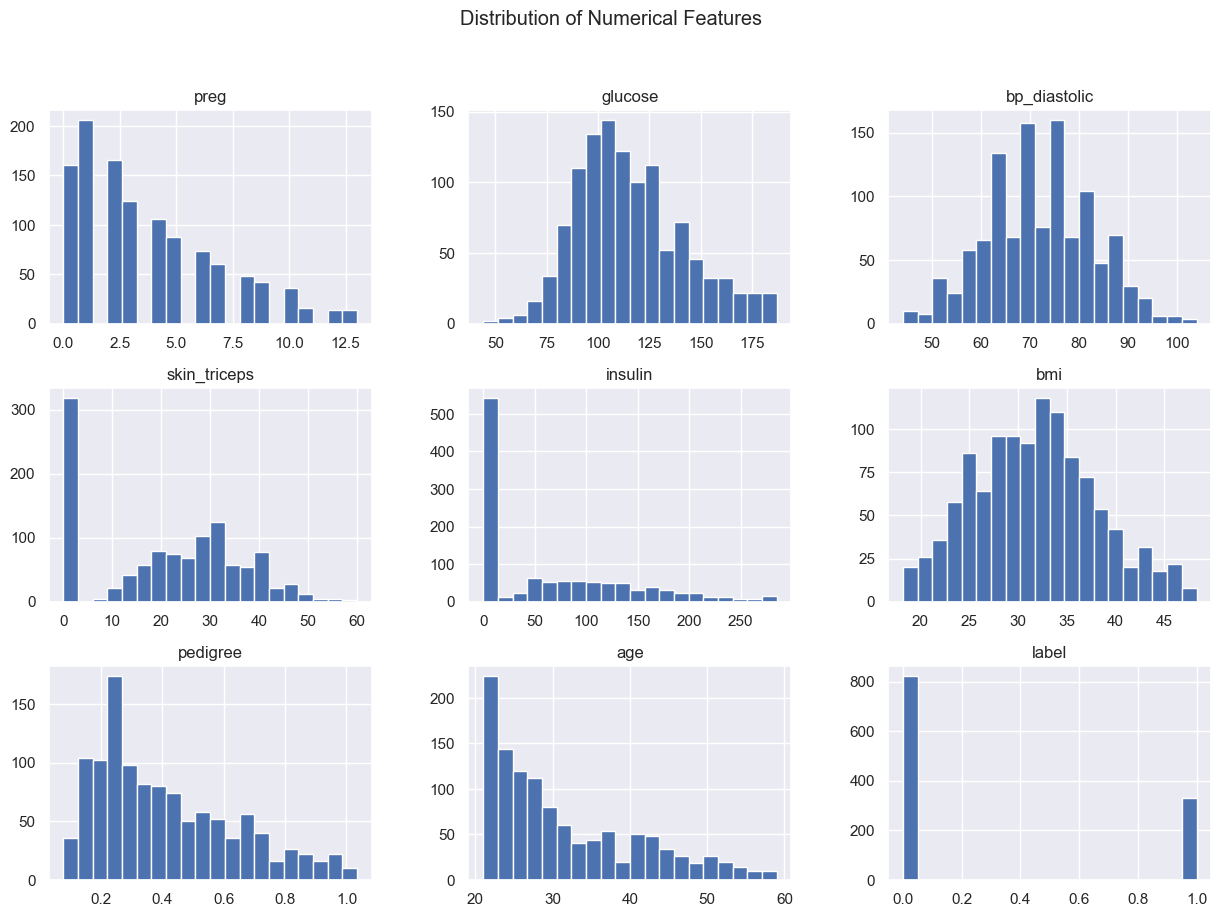

In [79]:
# Distribution of numerical features
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# HeatMap

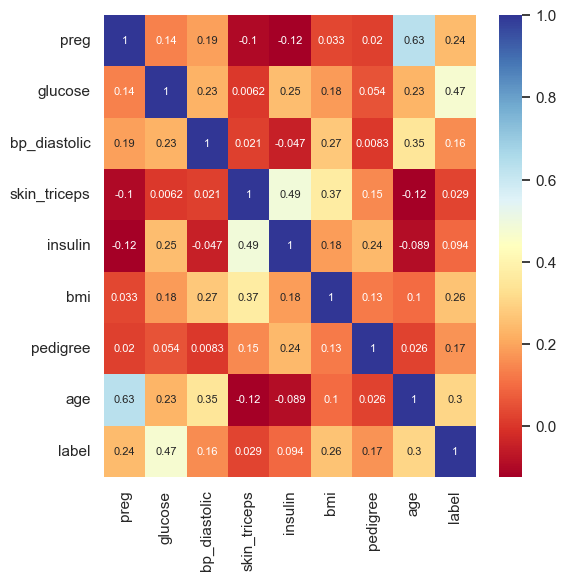

In [80]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlBu", annot_kws={"fontsize": 8});

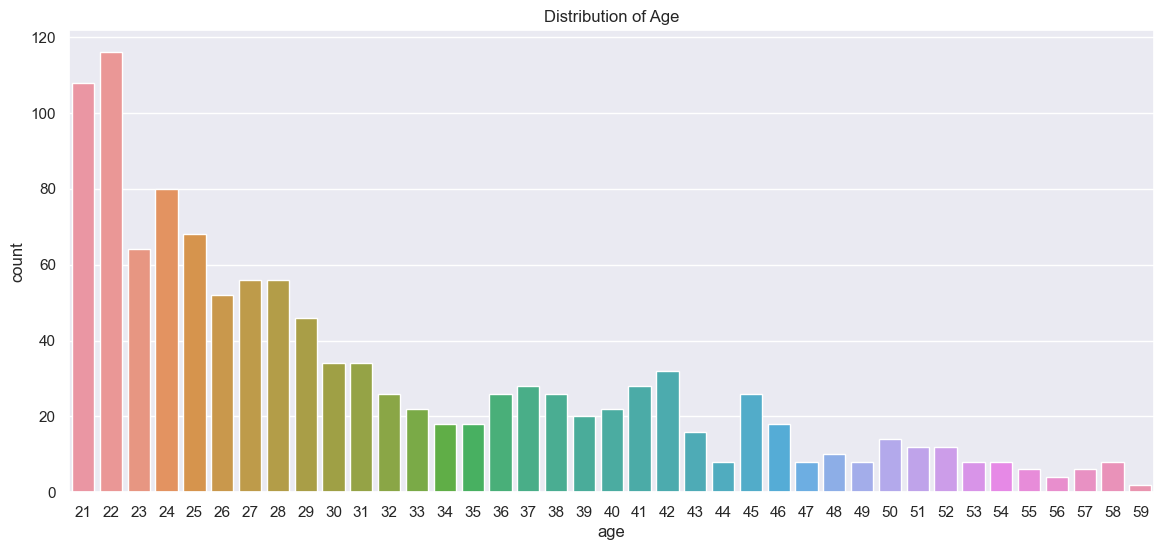

In [81]:
# Distribution of categorical features
sns.countplot(x='age', data=df)
plt.title('Distribution of Age')
plt.show()

In [82]:
cols=list(df.columns)
cols

['preg',
 'glucose',
 'bp_diastolic',
 'skin_triceps',
 'insulin',
 'bmi',
 'pedigree',
 'age',
 'label']

In [83]:
feature_cols=['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age']
print(feature_cols)

['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age']


# Data Train-Test split

In [84]:
#Library Call for data split in two portion Train and Test: 
from sklearn.model_selection import train_test_split

In [85]:
#dataframe
x=df[feature_cols]  #feature
#series
y=df.label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25, random_state=30)

In [86]:
#Total size of the Training dataset:
print("[XY_Train] dataset Shape:", x_train.shape)

#Total size of the Testing dataset:
print("[XY_Test] dataset Shape:", x_test.shape)

[XY_Train] dataset Shape: (865, 8)
[XY_Test] dataset Shape: (289, 8)


In [87]:
#Checking the number of 0's in Training portion of the Dataset:
print("[Y_Train] Total number of [0] in dataset :", len(y_train[y_train==0]))

#Checking the number of 1's in Training portion of the Dataset:
print("[Y_Train] Total number of [1] in dataset :", len(y_train[y_train==1]))

[Y_Train] Total number of [0] in dataset : 609
[Y_Train] Total number of [1] in dataset : 256


In [88]:
#Checking the number of 0's in Testing portion of the Dataset:
print("[Y_Test] Total number of [0] in dataset :", len(y_test[y_test==0]))

#Checking the number of 1's in Testing portion of the Dataset:
print("[Y_Test] Total number of [1] in dataset :", len(y_test[y_test==1]))

[Y_Test] Total number of [0] in dataset : 213
[Y_Test] Total number of [1] in dataset : 76


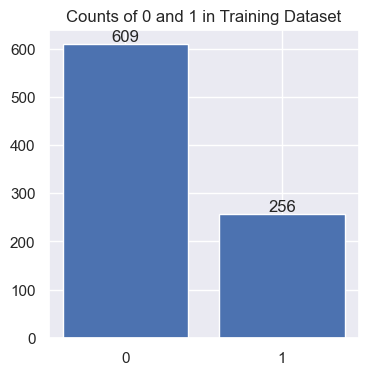

In [89]:
# get total number of 0 in the training dataset
Trcount0 = y_train[y_train==0].count()

# get total number of 1 in the training dataset
Trcount1 = y_train[y_train==1].count()

# Plotting the bar chart
label = ['0', '1']
counts = [Trcount0, Trcount1]

plt.figure(figsize=(4,4))
plt.title('Counts of 0 and 1 in Training Dataset')
plt.bar(label, counts)

# Add annotations to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
   
plt.show()

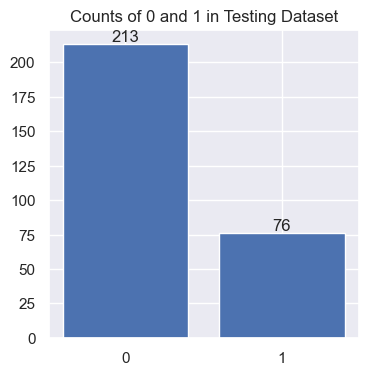

In [90]:
# get total number of 0 in the testing dataset
Trcount0 = y_test[y_test==0].count()

# get total number of 1 in the testing dataset
Trcount1 = y_test[y_test==1].count()

# Plotting the bar chart
label = ['0', '1']
counts = [Trcount0, Trcount1]

plt.figure(figsize=(4,4))
plt.title('Counts of 0 and 1 in Testing Dataset')
plt.bar(label, counts)

# Add annotations to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
   
plt.show()

# Random Forest Lib Call

In [91]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=3)

In [92]:
# Train Classifer
model = clf.fit(x_train, y_train)

# Model

In [93]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [94]:
y=pd.DataFrame({"Origional": y_test, "Predicted": y_pred})
y.head()

,Origional,Predicted
575,0,0
0,1,1
572,0,0
1284,1,1
611,1,1


In [95]:
y.sample(10)

,Origional,Predicted
473,0,0
3,0,0
135,0,0
652,0,0
735,0,0
1295,0,0
253,0,0
116,1,1
1341,0,0
832,1,1


# Confusion Matrics

Confusion Matrix:
[[197  16]
 [  8  68]]


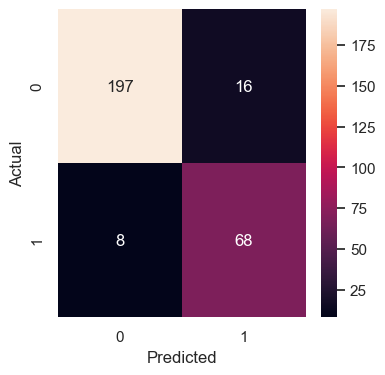

In [96]:
# calculate accuracy
from sklearn import metrics

result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize=(4,4))
    c_mtrx = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx, annot=True, fmt = '.3g')

plt1()

# Accuracy Calculation

In [97]:
#[row, column]
#(Actual, Predict)
TP = result[1, 1]      
TN = result[0, 0]
FP = result[0, 1]
FN = result[1, 0]

In [98]:
def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))
    print('###########################################')
EvClsMdl(result)

Metrics computed from a confusion matrix
Accuracy:	 0.916955017301038
Sensitivity:	 0.8947368421052632
Specificity:	 0.9248826291079812
Precision:	 0.8095238095238095
Classification Eerror: 0.08304498269896199
False_Positive_Rate: 0.07511737089201875
###########################################


# KNN Algorithm

# Before Improvement 

# After Improvement

# Decision Tree Algorithm

# Before Improvement

# After Improvement

# Random Forest Accuracy

# Before Improvement

# After Improvement 